<a href="https://colab.research.google.com/github/PatricioZain/DinamicaNoLinealFCAG/blob/main/WhiskerMapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dinámica No Lineal 
**Práctica 7 - Whisker Mapping**

Las interacciones entre las resonancias generan perturbaciones en sus separatrices, que dan lugar a una capa estocástica de movimiento caótico. El Whisker Mapping (WM) es un mapa que describe el movimiento en las vecindades de la separatriz, donde la variable $w$ es la energía relativa respecto a la separatriz. 

El Whisker Mapping está dado por la expresión: 

$$\overline {w} = w + W\sin\tau_0,\quad\qquad 
\overline{\tau}_0=\tau_0+\lambda\ln\frac{32}{|\overline{w}|},\qquad w\in\mathbb{R},\,\,\tau_0\,\, {\rm mod}\,\, 2\pi,$$
con $W < 0$ y $\lambda>0$ par\'ametros constantes.

Aquí usamos la expresión derivada en la práctica, dada por 

$$\overline {s} = s - \sin t,\qquad\qquad 
\overline{t}=t-\lambda\ln|\overline{s}| + G, $$
con
$s=w/|W|,\, t\equiv\tau_0$ y $G=\lambda\ln(32/|W|)$.


Primero vamos a definir la condición inicial $t_0$ y $s_0$.



In [28]:
t0 = 0.01
s0 = 0.01

Ahora el número de iteraciones $n$ y el parámetro $λ$

In [29]:
n = 10000
lamda = 8

In [30]:
W = 1.e-10
G = lamda*np.log(32./W)

Ahora pasamos a calcular el Whisker Mapping

In [31]:
import numpy as np
from numpy import pi

ss = np.zeros(n) 	#vectores para luego graficar
tt = np.zeros(n)

t = t0
s = s0


for i in range(n):
	s = s - np.sin(t)
	t = t-lamda*np.log(np.absolute(s))+G
	t = np.mod(t,2*pi)	#para que sea periodico en 2pi
	
	if t<-pi:			#porque t esta en (-pi,pi)
		t = t + 2*pi
	elif t>pi:
		t = t - 2*pi

	ss[i] = s
	tt[i] = t


y graficamos! 

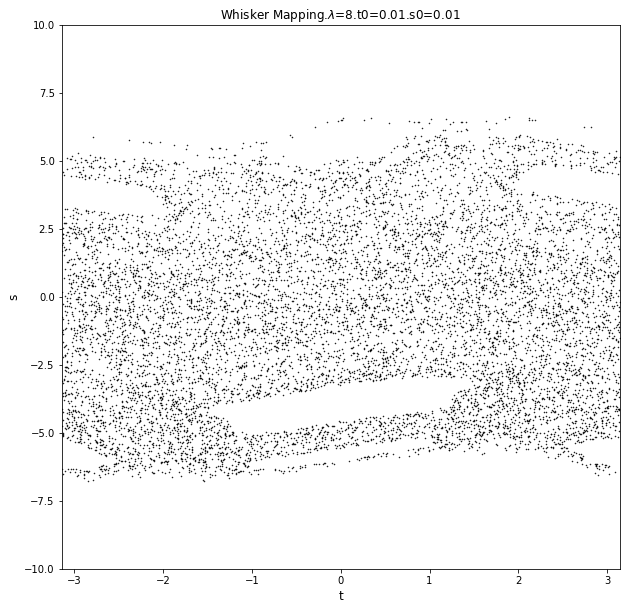

In [42]:
import matplotlib.pyplot as plt

nombre='.t0='+str(t0)+r'.s0='+str(s0)

plt.figure(figsize=(10,10))
plt.plot(tt,ss,'.',markersize='1',color='k')			
plt.xlim(-pi,pi)
plt.ylim(-10,10)
plt.title('Whisker Mapping.'+r'$\lambda$='+str(lamda)+nombre)
plt.xlabel('t',fontsize='large')
plt.ylabel('s',fontsize='large')
plt.show()

Ahora vamos a correr nuevamente el Whisker Mapping, pero para una trayectoria iniciada en una condición inicial separada en una cantidad $d_0=10^{-9}$ de nuestra condición inicial anterior. 
Calcularemos la separación en cada iteración entre ambas trayectorias $\delta_i=\sqrt{(t_2-t_1)^2+(s_2-s_1)^2}$ con $i=0,1,...n$.

In [33]:
d0 = 1e-9
s2 = s0 + d0
t2 = t0 + d0

tt2 = np.zeros(n) 
ss2 = np.zeros(n)
delta = np.zeros(n)

for i in range(n):	
	s2 = s2 - np.sin(t2)
	t2 = t2 - lamda*np.log(np.absolute(s2))+G
	t2 = np.mod(t2,2*pi)
	
	if t2<-pi:
		t2 = t2 + 2*pi
	if t2>pi:
		t2 = t2 - 2*pi		

	delta[i]=np.sqrt((s-s2)**2+(t-t2)**2)

Y graficamos $\delta$ \
¿Como es $\delta$ para una trayectoria regular? ¿y para una caótica?

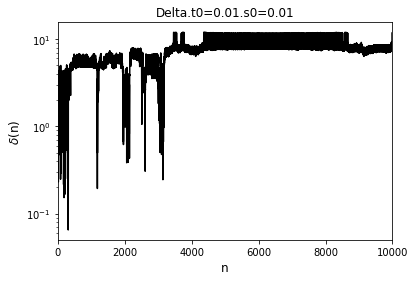

In [43]:
x=np.linspace(1,n,n)

plt.figure()
plt.plot(x,delta,color='k')			
plt.xlim(0,n)
plt.yscale('log')
plt.title('Delta'+nombre,fontsize='large')
plt.xlabel('n',fontsize='large')
plt.ylabel(r'$\delta$(n)',fontsize='large')

plt.show()

